## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata_df,study_results_df, on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
combined_df['Mouse ID'].count()

1893

In [3]:
combined_df[['Mouse ID','Timepoint']].head(10)

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
5,k403,25
6,k403,30
7,k403,35
8,k403,40
9,k403,45


In [4]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
combined_df.duplicated(subset=['Mouse ID','Timepoint']).head()


0    False
1    False
2    False
3    False
4    False
dtype: bool

In [5]:
# Drop any duplicate rows
combined_df2 = combined_df.drop_duplicates(keep = 'first')
combined_df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Recheck the number of mice
combined_df2['Mouse ID'].count()

1892

In [7]:
#Setting new column names as the original took long to type in new DF
combined_df2.columns = ['mouse_id','drug','sex','age','weight','time','tumor','meta']
combined_df2

,mouse_id,drug,sex,age,weight,time,tumor,meta
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each drug.

#Get the Mean of all the drugs
mean = combined_df2.groupby('drug').mean()['tumor']
#Get the Median of all the drugs
median = combined_df2.groupby('drug').median()['tumor']
#Get the Variance of all the drugs
variance = combined_df2.groupby('drug').var()['tumor']
#Get the Standard Deviation of all the drugs
std_dev = combined_df2.groupby('drug').std()['tumor']
#Get the SEM of all the drugs
sem = combined_df2.groupby('drug').sem()['tumor']

#Create the DF to store all the calculated variables into a new DF summary_stats_df
summary_stats_df = pd.DataFrame({'Mean':mean, 'Median':median, 'Variance':variance, 
                                 'Standard Dev':std_dev, 'SEM':sem})

summary_stats_df

,Mean,Median,Variance,Standard Dev,SEM
drug,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

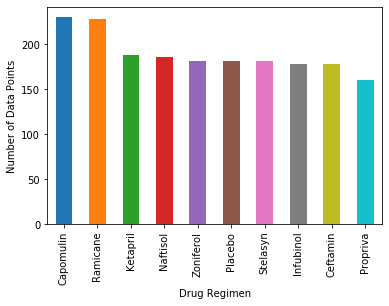

In [24]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen

#get the count of all the Drungs being tested
count = combined_df2['drug'].value_counts()
#create the bar chart with the name of the drug and the count, changed the colors to represent each drug 
axis = count.plot(kind='bar', color= ['C0', 'C1', 'C2', 'C3', 'C4', 'C5','C6','C7','C8','C9'])
#define the X label as the Drug Regimen
axis.set_xlabel('Drug Regimen')
#define the Y label as the count of drugs
axis.set_ylabel('Number of Data Points')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

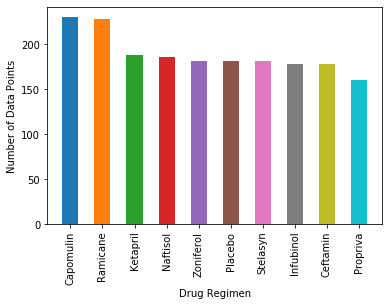

In [33]:
# Generate identical bar plot using pyplot instead of pandas.

#get the count for each drug and store it in values
values = combined_df2['drug'].value_counts()
#get the drug name by calling the index of the values thus giving us just the name of the drug
labels = values.index
#generate the pyplot using the labels as the X axis and the values as the Y axis
plt.bar(labels, values, color = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5','C6','C7','C8','C9'],
                                align="center", width=.50)
#define the X label as the Drug Regimen
plt.xlabel('Drug Regimen')
#define the Y label as the count of drugs
plt.ylabel('Number of Data Points')
#rotate the X labels vertically 90 degrees
plt.xticks(rotation=90)


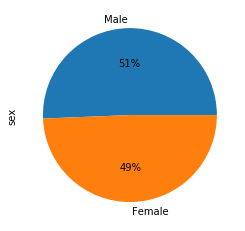

In [86]:
#Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = combined_df2['sex'].value_counts()
#Generate pie plot using pandas
chart = gender_count.plot(kind='pie', startangle=0, autopct='%.f%%')


In [115]:
gender_count.values[0]

958

([<matplotlib.patches.Wedge at 0x7fd32304f5d0>,
 [Text(-0.02291276184213429, 1.149771718796721, 'Female'),
  Text(0.02191645183653077, -1.0997816461183998, 'Male')],
 [Text(-0.012950691475988946, 0.6498709714937987, '51%'),
  Text(0.011954428274471329, -0.5998808978827634, '49%')])

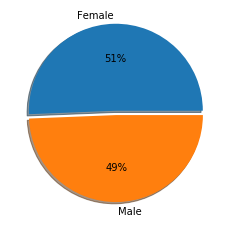

In [83]:
# Generate identical pie plot using pyplot
#set colors for the two tabs
colors = ["tab:blue", "tab:orange"]
#create a little separation using the explode feature to enphasize the pie chart better
explode = (.05,0)
#create the labels one to represent females and the other male
genders = ["Female", "Male"]

#Generate pie plot using pyplot 
plt.pie(gender_count, explode=explode, labels=genders, colors=colors,
        autopct="%.f%%", shadow=True, startangle=0)


## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#get all the data for Capomulin drug
Capomulin = combined_df2.loc[combined_df2['drug'] == 'Capomulin']
#get all the data for Ramicane drug
Ramicane = combined_df2.loc[combined_df2['drug'] == 'Ramicane']
#get all the data for Infubinol drug
Infubinol = combined_df2.loc[combined_df2['drug'] == 'Infubinol']
#get all the data for Ceftamin drug
Ceftamin = combined_df2.loc[combined_df2['drug'] == 'Ceftamin']

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
#Last timepoint for each mouse for Capomulin
Cap_final_time = Capomulin.groupby('mouse_id').max()['time']
Cap_final_volume = pd.DataFrame(Cap_final_time)
#Last timepoint for each mouse for Ramicane
Ram_final_time = Ramicane.groupby('mouse_id').max()['time']
Ram_final_volume = pd.DataFrame(Ram_final_time)
#Last timepoint for each mouse for Infubinol
Inf_final_time = Infubinol.groupby('mouse_id').max()['time']
Inf_final_volume = pd.DataFrame(Inf_final_time)
#Last timepoint for each mouse for Ceftamin
Cef_final_time = Ceftamin.groupby('mouse_id').max()['time']
Cef_final_volume = pd.DataFrame(Cef_final_time)

# Merge Capomulin df with the original dataframe to get the tumor volume at the last timepoint
Cap_merge = pd.merge(Cap_final_volume,combined_df2, on=('mouse_id','time'),how='left')
Cap_total_volume = Cap_merge['tumor']
# Merge Ramicane df with the original dataframe to get the tumor volume at the last timepoint
Ram_merge = pd.merge(Ram_final_volume,combined_df2, on=('mouse_id','time'),how='left')
Ram_total_volume = Ram_merge['tumor']
# Merge Infubinol df with the original dataframe to get the tumor volume at the last timepoint
Inf_merge = pd.merge(Inf_final_volume,combined_df2, on=('mouse_id','time'),how='left')
Inf_total_volume = Inf_merge['tumor']
# Merge Ceftamin df with the original dataframe to get the tumor volume at the last timepoint
Cef_merge = pd.merge(Cef_final_volume,combined_df2, on=('mouse_id','time'),how='left')
Cef_total_volume = Cef_merge['tumor']



Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [178]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.
# Calculate Quartiles Lower, Upper and IQR for Capomulin
Cap_quartiles = Cap_total_volume.quantile([.25,.5,.75])
Cap_lowerq = Cap_quartiles[0.25]
Cap_upperq = Cap_quartiles[0.75]
Cap_iqr = Cap_upperq-Cap_lowerq
Cap_lower_bound = Cap_lowerq - (1.5*Cap_iqr)
Cap_upper_bound = Cap_upperq + (1.5*Cap_iqr)

# Calculate Quartiles Lower, Upper and IQR for Ramicane
Ram_quartiles = Ram_total_volume.quantile([.25,.5,.75])
Ram_lowerq = Ram_quartiles[0.25]
Ram_upperq = Ram_quartiles[0.75]
Ram_iqr = Ram_upperq-Ram_lowerq

Ram_lower_bound = Ram_lowerq - (1.5*Ram_iqr)
Ram_upper_bound = Ram_upperq + (1.5*Ram_iqr)

# Calculate Quartiles Lower, Upper and IQR for Infubinol
Inf_quartiles = Inf_total_volume.quantile([.25,.5,.75])
Inf_lowerq = Inf_quartiles[0.25]
Inf_upperq = Inf_quartiles[0.75]
Inf_iqr = Inf_upperq-Inf_lowerq

Inf_lower_bound = Inf_lowerq - (1.5*Inf_iqr)
Inf_upper_bound = Inf_upperq + (1.5*Inf_iqr)

# Calculate Quartiles Lower, Upper and IQR for Ceftamin
Cef_quartiles = Cef_total_volume.quantile([.25,.5,.75])
Cef_lowerq = Cef_quartiles[0.25]
Cef_upperq = Cef_quartiles[0.75]
Cef_iqr = Cef_upperq-Cef_lowerq

Cef_lower_bound = Cef_lowerq - (1.5*Cef_iqr)
Cef_upper_bound = Cef_upperq + (1.5*Cef_iqr)

#print out the findings
print(f"Capomulin Values below {Cap_lower_bound} and above {Cap_upper_bound} could be outliers. IQR is {Cap_iqr}")
print(f"Ramicane Values below {Ram_lower_bound} and above {Ram_upper_bound} could be outliers. IQR is {Ram_iqr}")
print(f"Infubinol Values below {Inf_lower_bound} and above {Inf_upper_bound} could be outliers. IQR is {Inf_iqr}")
print(f"Capomulin Values below {Cap_lower_bound} and above {Cap_upper_bound} could be outliers. IQR is {Cap_iqr}")
print(f"We can determing that Infobinol is the drug that has an outlier as it has an IQR of {Inf_iqr}")

Capomulin Values below 20.70456164999999 and above 51.83201549 could be outliers. IQR is 7.781863460000004
Ramicane Values below 17.912664470000003 and above 54.30681135 could be outliers. IQR is 9.098536719999998
Infubinol Values below 36.83290494999999 and above 82.74144559000001 could be outliers. IQR is 11.477135160000003
Capomulin Values below 20.70456164999999 and above 51.83201549 could be outliers. IQR is 7.781863460000004
We can determing that Infobinol is the drug that has and outlier as it has an IQR of 11.477135160000003


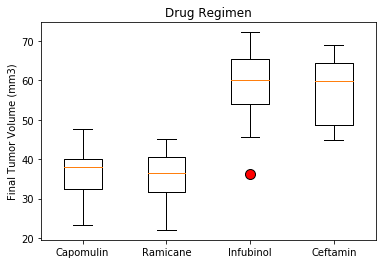

In [177]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.

#Combine all 4 regimens last Tumor Volume to be able to plot
all_regimen = [Cap_total_volume, Ram_total_volume, Inf_total_volume, Cef_total_volume]
#setup chart with Title and Y labels
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
#set the color of the marker to red and make it a circle
flierprops = dict(marker='o', markerfacecolor='r', markersize=10,
                  linestyle='none')
#generate the boxplot with the drugs as labels
ax1.boxplot(all_regimen, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"]
            ,flierprops=flierprops)
plt.show()

## Line and Scatter Plots

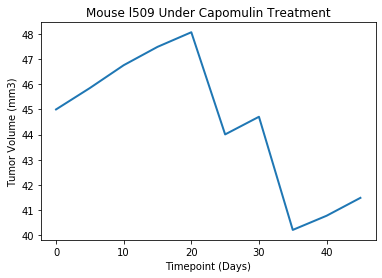

In [180]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
#find the mouse l509 and get data
find_l509 = Capomulin.loc[Capomulin['mouse_id'] == 'l509',:]

#set x and y axis from mouse l509
x_axis = find_l509['time']
y_axis = find_l509['tumor']

#set plot points and plot the line
plt.title('Mouse l509 Under Capomulin Treatment')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis, y_axis, linewidth = 2, markersize = 12)


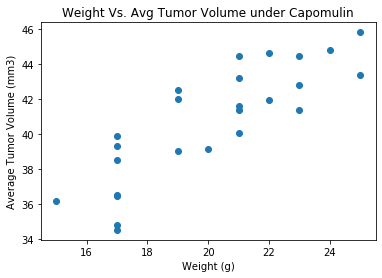

In [183]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen

#get the average for x and y axis
Cap_avg = Capomulin.groupby('mouse_id').mean()
x_axis = Cap_avg['weight']
y_axis = Cap_avg['tumor']

#Set plot points and plot the scatter
plt.title('Weight Vs. Avg Tumor Volume under Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(x_axis,y_axis)

## Correlation and Regression

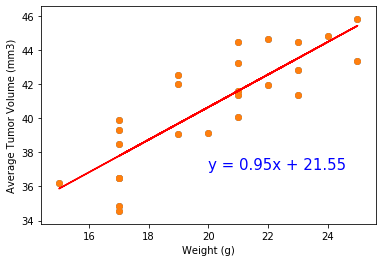

In [192]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#import linregress module
from scipy.stats import linregress

#Calculate Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Set plot points and plot Scatter 
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="blue")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(x_axis,y_axis)

# Observations and Insights

After getting all the data together we can determine a few things.

1) Infubinol was the only drug that had clear outliers as illustrated in the BoxPlot chart

2) Seems like there is a slight correlation as mouse weight increased so did the average volume of the tumor under the Capomulin regimen 

3) From picking one sample mouse that was under the Capomulin regimen, the tumor size decreased through time. 

